# I. INTRODUCTION
We will start by looking at the Integer Multiplication problem.

To multiply two numbers we need to have the following primitive operations

Add two single digit numbers
Multiply two single-digit numbers
Append of prepend a 0 to a number
Following image shows how perform the following multiplication $5678 \times 1234$

<img src="images/1_multiply.png">

**What you probably realized back in third grade, is that this algorithm is what we would call correct. That is, no matter what integers x and y you start with If you carry out this procedure, this algorithm. And all of your intermediate computations are done properly. Then the algorithm will eventually terminate with the product, x times y, of the two input numbers. You're never going to get a wrong answer. **

Let us now analyze the total number of operations for multiplying two n digit numbers

A partial product involves multiplying 1 digit of an n digit number with another n digit. Each multiplication involves atmost $2n$ operations where we have n multiplications for an n digit number and then an addition if a carry is generated from the previous multiplication operation. Essentially we have $n \times 2n$ operations giving is $2n^2$ multiply operations for multiplying two n digit numbers.

We still are left with adding up these partial products. We have n rows of these partial sums and each of these n rows can have a carry giving us a maximum of 2n operations per row and thus adding up all partial sums gives is $n \times 2n = 2n^2$ operations

Thus the conventional multiplication takes $2n^2 + 2n^2 = 4n^2$ operations. Or, more generally the number of operations for performing multiplication of two n digit numbers is $Cn^ 2$ operations. **Thus the work in the Grade-School Multiplication Algorithm increases quadratically with the number of digits in the the number.** For example, if you double the size of the input, if you double the number of digits in each of the two integers that you're given. Then the number of operations you will have to perform using this algorithm has to go up by a factor of four. Similarly, if you quadruple the input length, the number of operations going, is going to go up by a factor of 16, and so on.


***

 **Can we do better than $n^2$ complexity?**

Let us look at an alternate way to multiply two numbers known as *Karatsuba Multiplication*. We will us ethe same two numbers 5678 and 1234 and see Karatsuba Multiplication in action.

Break up these two 4 digit numbers into halfs, thus we get 4 smaller numbers of 2 digits each. We call them a, b, c and d. Thus for the above example, 5678 will be split in two numbers 56 and 78 and we call them a and b respectively. Similarly, 1234 will be split into c and d with values 12 and 34 respectively.
Compute $a \times c$ which is $56 \times 12 = 672$
Compute $b \times d$ which is $78 \times 34 = 2652$
Compute $(a + b) \times (c + d)$ which is $(56 + 78) \times (12 + 34) = 6164$
Subtract the first two results from the third, thus we get $6164 - 672 - 2652 = 2840$
Compute $10^4 \times 672 + 10^2 \times  2840 + 2652 = 7006652$

The above result is exactly same as the one we got using the conventional method.

***

Before we implement the Karatsuba multiplication, let us implement a **recursive approach to multiply two numbers**. Let the two number be n digit numbers x and y, to keep the initial implementation simple, we assume both the numbers are n digits but can easily be extended to two numbers of different number of digits.

Let x and y be split into two $n/2$ digit numbers a, b and c,d respectively.

Thus  $x = 10^{n/2}.a + b$ and $y = 10^ {n/2}.c + d$

$x.y   =   (10^ {n/2}.a + b) \times (10^ {n/2}.c + d)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $ =   10^n.ab + 10^{n/2}.(a.d + b.c) + b.d $


Let us call the following expression on RHS as Star (*) expression : <br>
 $x.y = 10^n.ab + 10^{n/2}.(a.d + b.c) + b.d $ 


Following code snippet rec_int_mult implements this recursive multiplication of two numbers. But first we will be defining a simple function which will take a number and pad it with leading 0 so that the length of the number if a power of 2 for simplicity in recursion

In [72]:
def recursive_integer_multiplication(x, y):
    #print("x: {} , y: {}".format(x,y))
    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    if len(x) < len(y):
        x = '0'*(len(y) - len(x))  + x  
    elif len(x) > len(y):
        y = '0'*(len(x) - len(y))  + y  
    
    split = len(x) // 2
    if len(x) % 2 != 0:
        split += 1
    
    a , b =  x[:split], x[split:]
    c , d =  y[:split], y[split:]
        
    # We cheat a bit here by multiplying by powers of 10 which can be implemented purely as addition
    return (10**(len(x) if len(x) % 2 == 0 else (len(x)-1)) * recursive_integer_multiplication(a, c))  \
            + 10**(split if len(x) % 2 == 0 else (split-1)) \
                    * (recursive_integer_multiplication(a, d) + recursive_integer_multiplication(b, c)) \
            + recursive_integer_multiplication(b, d)

#print(recursive_integer_multiplication('1234','5678'))
print(recursive_integer_multiplication('46','134'))
#print(recursive_integer_multiplication('6','4'))

6164


In [111]:
def print_rec_int_mul(x, y):
    r = recursive_integer_multiplication(x, y)
    print("{} * {} = {}   vs {}  ".format(x, y, r, int(x)*int(y)))
    assert (r == int(x)*int(y)),"Not matched multiplication"

    
print(" x * y  =  RecursiveMul  vs  x*y \n")
print_rec_int_mul('1234','5678')   
print_rec_int_mul('46','134')   
print_rec_int_mul('6','4')   
print_rec_int_mul('10000','67568')
print_rec_int_mul('78229','192') 
print_rec_int_mul('29219','4') 
print_rec_int_mul('9299299200010293988475756643209128374645637282901001929837376447388292902038','01092983837476464545367388829292920202002020200202093983746464553552') 
print_rec_int_mul('4321','81882929828818') 
print_rec_int_mul('1111','222') 

 x * y  =  RecursiveMul  vs  x*y 

1234 * 5678 = 7006652   vs 7006652  
46 * 134 = 6164   vs 6164  
6 * 4 = 24   vs 24  
10000 * 67568 = 675680000   vs 675680000  
78229 * 192 = 15019968   vs 15019968  
29219 * 4 = 116876   vs 116876  
9299299200010293988475756643209128374645637282901001929837376447388292902038 * 01092983837476464545367388829292920202002020200202093983746464553552 = 10163983725469067928590493644244661053399214734991984685649826345477632767222851187708654237342103435977895678489334865506150114865206140938976   vs 10163983725469067928590493644244661053399214734991984685649826345477632767222851187708654237342103435977895678489334865506150114865206140938976  
4321 * 81882929828818 = 353816139790322578   vs 353816139790322578  
1111 * 222 = 246642   vs 246642  


## **Karatsuba multiplication**

The above code snippet involves performing 4 multiplications of smaller digit numbers. 

Gauss instead worked out a way to replace these 4 multiplications with 3 multiplications and some additions.

**Gauss's trick** : Essentially $(a.d + b.c)$ be replaced with $(a + b).(c + d) - a.c - b.d$ thus reducing the multiplications to the following three multiplications

- $a.c$
- $b.d$
- $(a + b).(c + d)$

Essentially we reduce 4 recursive calls with 3 as seen in the following code snippet which is generic enough to accept numbers with not necessarily same number of digits

In [131]:
def Karatsuba_Multiplication(x, y):
    #print("x: {} , y: {}".format(x,y))
    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    if len(x) < len(y):
        x = '0'*(len(y) - len(x))  + x  
    elif len(x) > len(y):
        y = '0'*(len(x) - len(y))  + y  
    
    split = len(x) // 2
    if len(x) % 2 != 0:
        split += 1
    
    a , b =  x[:split], x[split:]
    c , d =  y[:split], y[split:]
    
    # 3 multiplications instead of 4
    ac = Karatsuba_Multiplication(a, c)
    aplusb_times_cplusd =  Karatsuba_Multiplication(str(int(a)+int(b)), str(int(c)+int(d))) #Gauss's Trick : (a+b).(c+d) = (a+b).(c+d) − a.c − b.d
    bd = Karatsuba_Multiplication(b, d)
        
    return (10**(len(x) if len(x) % 2 == 0 else (len(x)-1)) * ac)  \
            + 10**(split if len(x) % 2 == 0 else (split-1)) * (aplusb_times_cplusd - ac - bd) \
            + bd 

In [132]:
def print_Karatsuba_Multiplication(x, y):
    r = Karatsuba_Multiplication(x, y)
    print("{} * {} = {}   vs {}  ".format(x, y, r, int(x)*int(y)))
    assert (r == int(x)*int(y)),"Not matched multiplication"

    
print(" x * y  =  Karatsuba_Multiplication  vs  x*y \n")
print_Karatsuba_Multiplication('1234','5678')   
print_Karatsuba_Multiplication('46','134')   
print_Karatsuba_Multiplication('6','4')   
print_Karatsuba_Multiplication('10000','67568')
print_Karatsuba_Multiplication('78229','192') 
print_Karatsuba_Multiplication('29219','4') 
print_Karatsuba_Multiplication('9299299200010293988475756643209128374645637282901001929837376447388292902038','01092983837476464545367388829292920202002020200202093983746464553552') 
print_Karatsuba_Multiplication('4321','81882929828818') 
print_Karatsuba_Multiplication('1111','222') 

 x * y  =  Karatsuba_Multiplication  vs  x*y 

1234 * 5678 = 7006652   vs 7006652  
46 * 134 = 6164   vs 6164  
6 * 4 = 24   vs 24  
10000 * 67568 = 675680000   vs 675680000  
78229 * 192 = 15019968   vs 15019968  
29219 * 4 = 116876   vs 116876  
9299299200010293988475756643209128374645637282901001929837376447388292902038 * 01092983837476464545367388829292920202002020200202093983746464553552 = 10163983725469067928590493644244661053399214734991984685649826345477632767222851187708654237342103435977895678489334865506150114865206140938976   vs 10163983725469067928590493644244661053399214734991984685649826345477632767222851187708654237342103435977895678489334865506150114865206140938976  
4321 * 81882929828818 = 353816139790322578   vs 353816139790322578  
1111 * 222 = 246642   vs 246642  


Following two cells demonstrate execute the test case and the challenge problem given at [this URL](http://algorithmsilluminated.org/).

In [127]:
print_Karatsuba_Multiplication('99999','9999') 
print_Karatsuba_Multiplication('3141592653589793238462643383279502884197169399375105820974944592','2718281828459045235360287471352662497757247093699959574966967627') 

99999 * 9999 = 999890001   vs 999890001  
3141592653589793238462643383279502884197169399375105820974944592 * 2718281828459045235360287471352662497757247093699959574966967627 = 8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184   vs 8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184  


By exactly how much Karatsuba_Multiplication is better than the Grade-School Multiplication Algorithm approach and is the divide and conquer approach in recursive_integer_multiplication any better than the Grade-School Multiplication Algorithm approach? We will look at answering this later after we finish the IV Chapter where we explore the Master Method.

## Merge Sort

We will now analyse one of the most widely used and an efficient sorting algorithm, *Merge Sort*

***

Following implementation is an example of **Insertion sort** which requires 2 passes of the array giving it **$O(n^2)$** complexity

In [185]:
def insertion_sort(arr):
    n = len(arr)
    for i in (range(1, n)):
        key = arr[i]
        j = i-1
        while j >=0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

print(insertion_sort([4, 3, 2, 10, 12, 1, 5, 6]))

[1, 2, 3, 4, 5, 6, 10, 12]



Quadratic time is not desirable for large arrays and we would ideally want to have an algorithm which have complexity $O(n)$.

With this goal in mind, let us see what merge sort does and then later derive it's time complexity.

The following picture shows how merge sort works

<img src="images/2_mergesort.png">


Following three operations is what we have in Merge Sort

- Split the input array in two, this is usually done by finding the middle index of the input array
- Recursively call sort on these two splits, this operation should return us two sorted arrays
- Merge the two sorted arrays in one array which would be sorted.

In the following code snippet we will implement merge sort. To keep the code simple and readable, we will not be making it efficient in terms of space. That is, we can allocate the entire array upfront and have the subproblems update a part of this preinitialized array.

In [181]:
def merge_sort(arr):
    n = len(arr)
    print("arr  {}".format(arr))
    if n == 1:
        return arr

    if n >= 1:
        left_tree = merge_sort(arr[ : n/2])   
        print("left_tree  {}".format(left_tree))
        right_tree = merge_sort(arr[n/2 : ])
        print("right_tree  {}".format(right_tree))
        sorted_arr = [None] * n
        i = 0
        j = 0
        for k in range(n):
            if(i < len(left_tree) and j < len(right_tree)):
                if left_tree[i] <= right_tree[j]:
                    sorted_arr[k] = left_tree[i]
                    print("1. sorted_arr  {}".format(sorted_arr))
                    i+=1 
                elif left_tree[i] > right_tree[j]:
                    sorted_arr[k] = right_tree[j]
                    print("2. sorted_arr  {}".format(sorted_arr))
                    j+=1 
                
            elif i >= len(left_tree) and j < len(right_tree):
                sorted_arr[k] = right_tree[j]
                print("3. sorted_arr  {}".format(sorted_arr))
                j += 1
            elif j >= len(right_tree) and i < len(left_tree):
                sorted_arr[k] = left_tree[i]
                print("4. sorted_arr  {}".format(sorted_arr))
                i += 1

    return  sorted_arr   
    

#print(merge_sort([4, 3, 2]))    
print(merge_sort([4, 3, 2, 10, 12, 1, 5, 6, 24, 33, 23,54, 12, 6 ]))

arr  [4, 3, 2, 10, 12, 1, 5, 6, 24, 33, 23, 54, 12, 6]
arr  [4, 3, 2, 10, 12, 1, 5]
arr  [4, 3, 2]
arr  [4]
left_tree  [4]
arr  [3, 2]
arr  [3]
left_tree  [3]
arr  [2]
right_tree  [2]
2. sorted_arr  [2, None]
4. sorted_arr  [2, 3]
right_tree  [2, 3]
2. sorted_arr  [2, None, None]
2. sorted_arr  [2, 3, None]
4. sorted_arr  [2, 3, 4]
left_tree  [2, 3, 4]
arr  [10, 12, 1, 5]
arr  [10, 12]
arr  [10]
left_tree  [10]
arr  [12]
right_tree  [12]
1. sorted_arr  [10, None]
3. sorted_arr  [10, 12]
left_tree  [10, 12]
arr  [1, 5]
arr  [1]
left_tree  [1]
arr  [5]
right_tree  [5]
1. sorted_arr  [1, None]
3. sorted_arr  [1, 5]
right_tree  [1, 5]
2. sorted_arr  [1, None, None, None]
2. sorted_arr  [1, 5, None, None]
4. sorted_arr  [1, 5, 10, None]
4. sorted_arr  [1, 5, 10, 12]
right_tree  [1, 5, 10, 12]
2. sorted_arr  [1, None, None, None, None, None, None]
1. sorted_arr  [1, 2, None, None, None, None, None]
1. sorted_arr  [1, 2, 3, None, None, None, None]
1. sorted_arr  [1, 2, 3, 4, None, None, None]

In [184]:
def merge_sort(arr):
    # Merge sort arrays in quasilinear time or log-linear time
    n = len(arr)
    if n == 1:
        return arr

    if n >= 1:
        left_tree = merge_sort(arr[ : n/2])   
        right_tree = merge_sort(arr[n/2 : ])
        # Merges the two sorted arrays into one sorted array in linear time
        sorted_arr = [None] * n
        i = 0
        j = 0
        for k in range(n):
            if(i < len(left_tree) and j < len(right_tree)):
                if left_tree[i] <= right_tree[j]:
                    sorted_arr[k] = left_tree[i]
                    i+=1 
                elif left_tree[i] > right_tree[j]:
                    sorted_arr[k] = right_tree[j]
                    j+=1 
                
            elif i >= len(left_tree):
                sorted_arr[k] = right_tree[j]
                j += 1
            elif j >= len(right_tree):
                sorted_arr[k] = left_tree[i]
                i += 1

    return  sorted_arr   
    

#print(merge_sort([4, 3, 2]))    
print(merge_sort([4, 3, 2, 10, 12, 1, 5, 6, 24, 33, 23,54, 12, 6,3 ]))

[1, 2, 3, 3, 4, 5, 6, 6, 10, 12, 12, 23, 24, 33, 54]


Again, as mentioned previously the above implementation is not efficient in terms of space as each recursive call generates a new list which is then discarted. Nevertheless it is succinct and is a good translation of the pseudocode to a working code.

We are more interested in the running time complexity of the Merge sort which we will analyze now. Following is the psuedo code for the merge operation we implemented above

<img src="images/3_mergesortalgo.png">

We see there are 2 operations for initilizing the variables i and j, and then the loop that runs n times. In the loop we peform the following

- Comparison C[i] < D[j]
- Assignment B[k] := C[i] or B[k] := D[j]
- Increment of variable i or j
- Increment of loop variable k

This we have a total of $4n + 2$ operations. We will make this a total of $6n$ since $6n > 4n + 2$

The number $6n$ is just an estimate and doesn't really consider a programming language's implementation. For example, the Python implementation of merge we have is strkingly similar to the the merge pseudo code and also implements some edge cases when all elements of one of the array are copied over. For the sake of analysis $6n$ is a reasonable estimate.

We thus have the following Lemma

For a input array of size $n$, merge function will merge them in one sorted list in no more than $6n$ operations

Now that we have an upper bound on the running time of Merge, let us see how many operations are required for entire merge sort call.

Following is the theorem we are looking to prove

Merge sort algoritm runs in at most $6nlog_2{x} + 6n$ operations for an input of size n

Following plots a linear and a log function for comparison (we imagine how huge the gains are by reducing the complexity from polynomial to logarithmic).



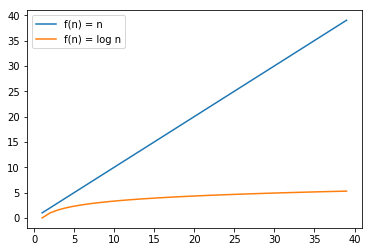

In [200]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.array([x for x in range(1, 40)])
logx = np.log2(x)
plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, logx, label = 'f(n) = log n')
plt.legend()
plt.show()

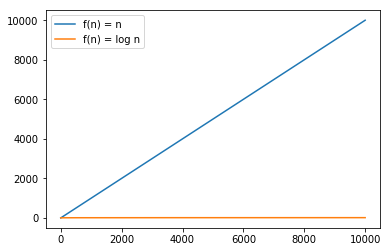

In [201]:
x = np.array([x for x in range(1, 10000)])
logx = np.log2(x)
plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, logx, label = 'f(n) = log n')
plt.legend()
plt.show()

We will prove the claim of the above theorem that merge sort runs in  $6nlog_2n + 6n$ time

Given an input of size n, we split it in two portions and call them the left and the right portion of the input array. We recursively do the same till we reach the leaves where we have 1 element each and no further splitting of the input can be done. With this splitting we end up getting $log_2n$ levels of the tree.
At each level we double the number of subproblems we have on the previous level. At root level we have 1 problem, at level 1 we have 2 problems, at level 2 we have 4 subproblems and so on. Generalizing this we see that at level j we have $2^n$ subproblems.
Similarly at each level, we split the input in two parts and call the the sort function recursively on these two halfs. For example, suppose at level 0(root) we have 8 inputs values. Then at level 1 we have all inputs presented with an input of size 4, at level 2 each subproblem is presented with an input of size 2 and finally at level 3 each subproblem is presented with an input of size 1. Thus generalizing this, we see that at each level the size of the input presented to a subproblem at level j is $n / 2^j$
We have seen earlier that for an input of size l, the work done by l is no more than than $6l$. Thus for an input of size $n/2^j$, the work done in merging it is $6n/2^j$.

If we simply focus on a level j of this recursive call tree (ignoring the recursive calls at level j). Then the total work done at level j is

#number of subproblems at level j $\times$ work done on input to level j subproblem which is

$2^n \times 6n/2^n = 6n$

This shows that irrespective of the level, the work done at level n is $6n$. This is due to the fact that the number of subproblems grow at the same rate at which the input to these sub problems shrink cancelling out each other.

For an input of size n we have $log_2n + 1$ levels. Thus the total work done by the merge sort to sort an input of size n is $6n \times (log_2n + 1) = 6nlog_2n + 6n$ proving our claim in the theorem.

***

### Guiding principles in the analysis of the algorithms
#### Principle #1, Worst-Case Analysis
For the above problem of merge sort, the worst case time complexity is $6nlog_2n + 6n$. Which essentially says that no matter what, for any possible input (in the domain of the valid acceptable inputs by the function), the complexity stated is what we can expect. Other approaches like average-case analysis assumes some most common inputs from the distribution of the possible inputs we expect to see and then give a complexity. Some other approach would be to benchmark the running time of the algorithm on a dataset which is the representative of the real world problems. In case of average-case analysis and benchmark, we require domain knowledge where as in case of worst case we don't make any assumptions on the possible inputs.

#### Principle #2, Big-Picture Analysis
We will be ignoring the constants and the lower order terms of the number of operations taken to execute the algorithm for an input of size n. There are few reasons for that

It makes it easier for mathematical analysis
Constants heavily depend on the environment. For example, the complexity of 6n for the merge operation seems reasonable in Pusedo code, but not really convincing when we look at the Python implementation of merge
We lose little predictive power. The constants and lower order complexity might be necessary for problems where its absolutely necessary for perform the analysis of the performance to the very fine details of the code, but for the big picture it is not necessary.

#### Principle #3, Asymptotic Analysis
This principle focuses on the growth rate of the algorithm with increase in size of the input. For example, the complexity of merge sort is $6nlog_2n + 6n$ and suppose another sorting algorithm has a complexity of $n^2 / 2$, the algorithm with quadaratic complexity will be faster than merge sort for smaller inputs. However when we analyse the complexity, it will be be large inputs as that is where the performance of the algorithms count. For an input of size 1000 or so, any sorting algorithm will give results quickly on modern computers. Following plot shows is the comparison of the above mentioned equations.

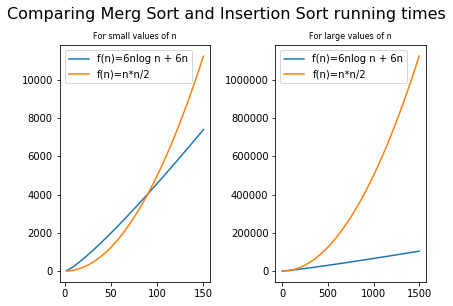

In [220]:
#Comparing Merg Sort and Insertion Sort running times
x = np.array([x for x in range(1, 1500)])
mruningtime = 6 * x * np.log2(x) + 6 * x
iruningtime = 0.5 * x**2

plt.subplot(121)
plt.plot(x[1:150], mruningtime[1:150],  label = 'f(n)=6nlog n + 6n')
plt.plot(x[1:150], iruningtime[1:150], label = 'f(n)=n*n/2')
plt.title('For small values of n', size=8)
plt.legend()

plt.subplot(122) 
plt.plot(x, mruningtime,  label = 'f(n)=6nlog n + 6n')
plt.plot(x, iruningtime, label = 'f(n)=n*n/2')
plt.title('For large values of n', size=8)
plt.legend()

plt.suptitle('Comparing Merg Sort and Insertion Sort running times', size=16).set_position([.5, 1.05])
plt.tight_layout()
plt.show()

### Test Your Understanding
Following is correct to the best of my understanding to the problems and not necessarily correct.

**Problem 1.1:** Suppose we run MergeSort on the following input, 5 3 8 9 1 7 0 2 6 4, after the two outermost recursive calls before the merge step, the two arrays glued together would be 1 3 5 8 9 0 2 4 6 7, thus the seventh element would be 2

**Problem 1.2:** A Modification to merge sort for splitting the input in three (3 way merge sort) will give us the complexity $nlog_3n$ complexity of more generally $nlogn$ complexity. We saw the merge is independent of the level as long as the sub problems grows at the same rate as the input shrinks. The number of levels in case of 3 way merge sort is $log_3n + 1$ levels.

**Problem 1.3:** We have k arrays of size n. Lets say k is 4, then for the first call of merge we have merge calls on array of size n, on second call we have array of size 2n and n and on third and final call we have array of size 3n and n. The complexity is $n + 2n + 3n =n(1 + 2 + 3) = nk(k - 1) / 2 \approx nk^2$

**Problem 1.4:** The total input size we have is nk. Going by the proof of Merge sort. If we split the arrays in 2 k/2 arrays of size n and recursively call merge on two sub groups, the effort to merge these segments of size n at each level is nk. We have a total of $\approx log_2k$ levels thus the complexity is $nklog_2k$

TODO: **Problem 1.5:** Find $2^{nd}$ largest element with no more than $n + log_2n - 2$ comparisons. 

**Problem 1.6:** Already implemented in the notebook earlier.

In [255]:
#Problem 1.2
def sort_2_of_3_subproblems(sorted_until , e1, e2 , inds, ind1, ind2):
    #print("sorted_until: {}".format(sorted_until))
    if e1 <= e2:
        sorted_until[inds] = e1
        ind1+=1 
    elif e1 > e2:
        sorted_until[inds] = e2
        ind2+=1 
    #print("sorted_until: {}".format(sorted_until))
    return sorted_until, ind1, ind2

def merge_sort_3way(arr):
    # Merge sort arrays in quasilinear time or log-linear time
    n = len(arr)
    if n == 1:
        return arr
    if n == 2:
        if arr[0] > arr[1]:
            temp = arr[0]
            arr[0] = arr[1]
            arr[1] = temp 
        return arr

    if n >= 3:
        left_tree = merge_sort_3way(arr[ : n/3])   
        middle_tree = merge_sort_3way(arr[n/3 : n*2/3])
        right_tree = merge_sort_3way(arr[n*2/3 : ])
        # Merges the 3 sorted arrays into one sorted array in linear time
        sorted_arr = [None] * n
        i = 0
        j = 0
        k = 0
        for s in range(n):
            if i < len(left_tree) or j < len(middle_tree) or k < len(right_tree):
                #print("1. i: {}  j : {}  k: {}".format(i,j,k))
                #print("left tree: {}\nmiddle tree: {}\nright tree: {}".format(left_tree, middle_tree, right_tree))
                if i == len(left_tree) or j == len(middle_tree) or k == len(right_tree):
                    #print("== == ==")
                    if (i == len(left_tree) or j == len(middle_tree)) and  k < len(right_tree):
                        if j < len(middle_tree) :
                            sorted_arr, j, k = sort_2_of_3_subproblems(sorted_arr , middle_tree[j], right_tree[k] , s, j, k)
                        elif i < len(left_tree):
                            sorted_arr, i, k = sort_2_of_3_subproblems(sorted_arr , left_tree[i], right_tree[k] , s, i, k)
                        else:
                            sorted_arr[s] = right_tree[k]
                            k += 1
                    elif i == len(left_tree):
                        sorted_arr[s] = middle_tree[j]
                        j += 1
                    elif j == len(middle_tree):
                        sorted_arr[s] = left_tree[i]
                        i += 1   
                    elif  i < len(left_tree) and j < len(middle_tree) and k == len(right_tree):
                        sorted_arr, i, j = sort_2_of_3_subproblems(sorted_arr , left_tree[i], middle_tree[j] , s, i, j)
                else:
                    #print("2. i: {}  j : {}  k: {}".format(i,j,k))
                    if left_tree[i] <= middle_tree[j] and  left_tree[i] <= right_tree[k]:
                        sorted_arr[s] = left_tree[i]
                        i += 1
                    elif middle_tree[j] < left_tree[i] and  middle_tree[j] <= right_tree[k]:
                        sorted_arr[s] = middle_tree[j] 
                        j += 1
                    else:
                        sorted_arr[s] = right_tree[k]
                        k += 1
            #print("sorted_arr : {}".format(sorted_arr))
    return  sorted_arr   
    

#print(merge_sort_3way([4, 3, 2]))    
#print(merge_sort_3way([3, 4, 2]))    
#print(merge_sort_3way([2, 3, 4,5]))    

print(merge_sort_3way([4, 3, 2, 10, 12, 1, 5, 6, 24, 33, 23,54, 12, 6,3 ]))

[1, 2, 3, 3, 4, 5, 6, 6, 10, 12, 12, 23, 24, 33, 54]


#  II. ASYMPTOTIC ANALYSIS

We will work on developing mathematical formalism for the the guiding principles we defined in the previous notebook. The goal is to identify the sweet spot of granularity for analysis of the running time of the algorithms and suppress lower order terms and constants.

Asymptotic notations provides basic voculabulary for discussing the design and analysis of the algorithms. The constant factors are to a great extent dependent on the system on which the program is run and lower order terms are irrelevant for large inputs.

Previously we analyzed the upper bound of the running time of Merge sort is $6nlogn + 6n$. The value 6 is system dependent and the value $nlogn$ is far greater than $n$ for large inputs. Thius we say, the big-O or merge sort is nlogn and is written as $O(nlogn)$

Intuitively $O(f(n))$ for a function $f(n)$ means that $f(n)$ is whats left after we suppress the constants and lower order terms.

***

### Big-O Notation
The English version of Big-O Notation is $T(n) = O(f(n))$ if and only if $T(n)$ is eventually bounded above by a constant multiple of $f(n)$

The mathematical version states that

$T(n) = O(f(n)) \iff T(n) \leq c\cdot f(n) \\ \forall n \geq n_0$

Let us look at these equations and plot them.

$T(n) = 6nlogn + 6n \\ f(n) = nlogn$

We will fix the constant $c$ to be 12 for the following plotting.


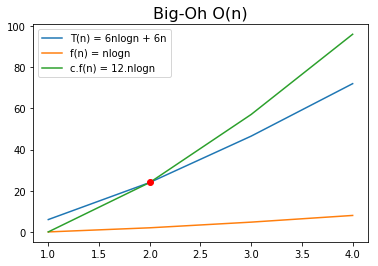

In [284]:
x = np.arange(1, 5)
tn = 6 * x * np.log2(x) + 6 * x
fn = x * np.log2(x)
cfn = 12 * x * np.log2(x)
plt.plot(x, tn, label = 'T(n) = 6nlogn + 6n')
plt.plot(x, fn, label = 'f(n) = nlogn')
plt.plot(x, cfn, label = 'c.f(n) = 12.nlogn')
plt.plot(x[tn - cfn == 0], cfn[tn - cfn == 0], 'ro')
plt.title('Big-Oh O(n)' , size=16)
plt.legend()
plt.show()

As we see in the above plot, $T(n) \leq c \cdot f(n)$. When $c$ is 12, we see $n_0$ is equal to 2. Thus for no value of n greater than or equal to 2, $T(n) > c \cdot f(n)$. The value of c = 12 is by no means the only legal value. In fact we can change the value of c to 8 and see that $n_0$ changes to 8. The only requirement is that c and $n_0$ are constants not dependent on n and the condition $T(n) \leq c \cdot f(n)$ holds true for any value of $n \geq n_0$

Have seen Big-O, we will now see two basic examples and come up with mathematical proofs for our claims. The proofs will be a sanity check that the Big-O is achieving the intended goal of suppressing the lower order terms and constant factors.

*** 

### Degree-k polynomial is  $O(n^k)$

Our claim is of $T(n)$ is a polynomial with degree-k, then $T(n) = O(n^k)$

Let $T(n) = a_kn^k + ... a_1n + a_0$ where $k \geq 0$ and $a_i$ is a real number

Let $c = |a_k| + |a_{k - 1}| ... |a_0|$

$T(n) = a_kn^k + ... a_1n + a_0 \leq |a_k|n^k + ... |a_1|n + |a_0| \leq |a_k|n^k + ... |a_1|n^k + |a_0|n^k$

$T(n) \leq (|a_k| + ... |a_1| + |a_0|)\cdot n^k$

Which is same as saying $T(n) \leq c\cdot n ^k$

Thus by definition of Big-O, we can conclude that $T(n) = O(n^k)$

Following is actually not an example

***

### Degree-k polynomial is not  $O(n^{k - 1})$

We will prove this by contradiction. We assume that $T(n) = n^k$ is $O(n^{k - 1})$

Thus by definition $T(n) \leq c\cdot O(n^{k - 1})$

which also implies that $n^k \leq c\cdot n^{k - 1}$ Cancelling out $n^{k - 1}$ on both sides, we get $n \leq c$ for $n \geq n_0$. This means c is greater than all positive numbers

Which violates the basic rule that c and $n_0$ are finite constants and independent of n. Thus we can say $n^k$ is not $O(n^{k - 1})$

***
### Big-Omega and Big-Theta

We will now see two more concepts, Big-Omega and Big-Theta notation. We will summarize all three notations, including Big-O below to compare them.

- Big-O:  $\:\:\:T(n) = O(n) \iff T(n) \leq c \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0 $
- Big-Omega: $\:\:\:T(n) = \Omega(n) \iff T(n) \geq c \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0 $
- Big-Theta: $\:\:\:T(n) = \Theta(n) \iff c_1\cdot f(n) \leq T(n) \leq c_2 \cdot f(n) \:\:\:\:\:\: \forall n \geq n_0$

Often where Big-Theta notation is more apt, developers still use the Big-O notation as we are usually interested in worst case guarantees. For example, the merge subroutine in merge sort performs the merge in guaranteed linear time and thus the time complexity if $\Theta(n)$, however, we still call it $O(n)$.

Let us look at the the same $T(n)$ used for Merge sort and look at the Big Omega times, we will use the following equations and plot the values

$T(n) = 6nlog(n) + 6n\\f(n) = n$

We will fix the constant $c, c_1$ and $c_2$ to be 12, 6 and 12 respectively

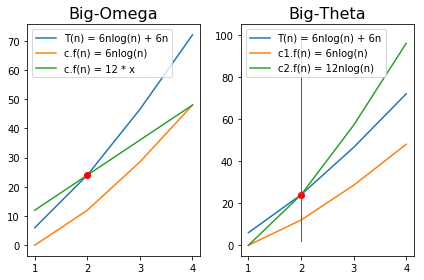

In [296]:

x = np.arange(1, 5)
tn = 6 * x * np.log2(x) + 6*x
cx = 12 * x
c1x = 6 * x * np.log2(x)
c2x = 12 * x * np.log2(x)

plt.subplot(121)
plt.plot(x, tn, label = 'T(n) = 6nlog(n) + 6n')
plt.plot(x, c1x, label = 'c.f(n) = 6nlog(n)')
plt.plot(x, cx, label = 'c.f(n) = 12 * x')
plt.plot(x[1], tn[1], 'ro')
plt.title('Big-Omega', size=16)
plt.legend()

plt.subplot(122)
plt.plot(x, tn, label = 'T(n) = 6nlog(n) + 6n')
plt.plot(x, c1x, label = 'c1.f(n) = 6nlog(n)')
plt.plot(x, c2x, label = 'c2.f(n) = 12nlog(n)')
plt.plot(x[1], tn[1], 'ro')
plt.plot([2, 2], [2, 100], lw = '1')
plt.title('Big-Theta', size=16)
plt.legend()
plt.tight_layout()
plt.show()

The first plot for Big-Omega above shows us that

$T(n) \geq  12 \cdot f(n) \:\: for \:\:n \geq 2$. Thus $T(n) = \Omega(n) \:\: for \:\:n \geq 2 \:\: and \:\: c = 12$

Now for Big Theta,

We see for $f(n) = nlog(n),\:T(n) = 6nlog(n) + 6n\\6\cdot f(n) \leq T(n) \leq 12 \cdot f(n)\:\: for\:\:n\geq 2$

Thus $T(n) = \Theta(n\cdot log(n))\:\:for\:\:c_1 = 6,\: c_2 = 12\:and\:n \geq 2$

*** 

##### Quiz

Let $T(n) = n^2 / 2 + 3n$, Which of the following statements are correct

a) $T(n) = O(n)$
b) $T(n) = \Omega(n)$
c) $T(n) = \Theta(n^2)$
d) $T(n) = O(n^3)$
b is correct, $T(n)$ is quadratic and thus it is easy to show $T(n) \geq c\cdot n$. This however is not a good lower bound but correct.

c is correct, we can come up with two constants $c_1 = 1/4$ and $c_2 = 2$ and show that $c_1\cdot f(n) \leq T(n) \leq c_2\cdot f(n)$

d is correct as $T(n) \leq c\cdot f(n)$, though not an impressive upper bound as $T(n)$ is quadratic where as $f(n)$ is cubic

***

###  Little-O notation

Little-0 notation is similar to the Big-O notation but is more strict in terms of the constant chosen. In case of Big-O notation, the constant s any positive value. However, in case of Little-O the constraint for c is strictly $c > 0$

Mathematically, $T(n) = o(f(n)) \iff T(n) \leq c \cdot f(n) \:\: \forall n \geq n_0 \: and\: c > 0 $

Claim: $T(n) = n^{k-1} \: then \: T(n) = o(n^k)$

Proof:

$ n^{k - 1} \leq c\cdot n^k \implies c \geq 1/n\\ as\: n \to\infty,\: c \to 0\\thus\:for\:c > 0\:\:n^{k-1} = o(n^k)$

***

#### Additional Examples

Adding a constant to exponent

Proposition:

$if\: T(n) = 2^{n + 10},\:then\:\:T(n) = O(2^n)$

For $T(n) = O(2^n)$, the following should hold true

$2^{n + 10} \leq c.2^n$

the above equation holds true for $c \geq 1024$. Hence $2^{n + 10} = O(2^n)$

***

Multiplying a constant to exponent

Proposition:

$if\: T(n) = 2^{10n},\:then\:\:T(n)\: is\:not\: O(2^n)$

The proof is by contradiction. Suppose

$2 ^{10n} = O(2^n) \implies 2^{10n} \leq c\cdot 2^n$

Thus $c \geq 2^{9n}$

c is a constant independent of n and as we see above c depends on n and $c \to\infty$ hence $2^{10n}$ is not $O(2^n)$
 
***

Maximum Vs Sum

Proposition:

Let f an g define functions from positive integers to non negative real numbers.

$if \:\:T(n) = max(f(n), g(n)) \:\: for\:\: n \geq 1 \:\:then\:\: T(n) = \Theta(f(n) + g(n))$

For any arbitrary n, we know that $max(f(n), g(n)) \leq f(n) + g(n)$

Similarly, $2\cdot max(f(n), g(n)) \geq f(n) + g(n) \implies 0.5\cdot (f(n) + g(n)) \leq max(f(n), g(n))$

Thus from above two statements we can see that

$0.5\cdot (f(n) + g(n)) \leq max(f(n), g(n)) \leq (f(n) + g(n))$

By definition,

$T(n) = \Theta(f(n)) \iff c_1\cdot f(n) \leq T(n) \leq c_2\cdot f(n) \:\: \forall n \geq n_0$

From above, we see that

$c_1 = 0.5\\c_2 = 1\\n > 0$

and

$max(f(n), g(n)) = \Theta(f(n) + g(n))$

***

#### Test Your Understanding

Let f and g be non-decreasing real-values functions defined on positive integers with $f(n)$ and $g(n)$ at least 1 for $n \geq 1$. Assume that  $f(n) = O(g(n))$, ald let c be positive constant. Is $f(n).log_2(f(n)^c) = O(g(n).log_2(g(n)))$?

A: Yes, $f(n).log_2(f(n)^c) = c\cdot f(n).log_2(f(n))$. Since its is big-o notation, the constants are suppressed and thus $f(n).log_2(f(n)) \leq O((n).log_2(g(n)))$ given $f(n) = O(g(n))$

Assume again two positive non-decreasing functions f and g such that $f(n) = O(g(n))$. Is $2^{(f(n))} = O(2^{g(n)})$?

A: If $f(n) \leq g(n)$ then $2^{f(n)} \leq 2^{g(n)}$. This given $f(n) \leq g(n)$ for sufficiently large n, $2^{f(n)} = O(2^{g(n)})$.

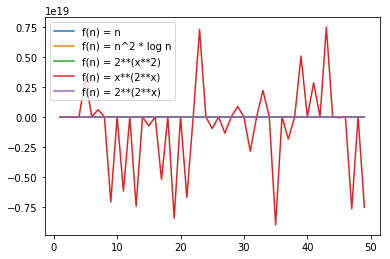

In [266]:
# Analysing the following expressions
%matplotlib inline
x = np.array([x for x in range(1, 50)])
x2logx = np.power(x, 2) * np.log2(x)
i2x2 = np.power(2, np.power(x, 2))
#print(np.power(2, x))
x2x =  np.power(x, np.power(2, x)) 
i22x = np.power(2, np.power(2, x)) 


plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, x2logx, label = 'f(n) = n^2 * log n')
plt.plot(x, i2x2, label = 'f(n) = 2**(x**2)')
plt.plot(x, x2x, label = 'f(n) = x**(2**x)')
plt.plot(x, i22x, label = 'f(n) = 2**(2**x)')

plt.legend()
plt.show()


In [271]:
# Overflow when using np.int64
%matplotlib inline
x = np.array([x for x in range(1, 100)], dtype=np.int64)

print(np.power(2, x))
x2x =  np.power(x, np.power(2, x)) 


plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, x2x, label = 'f(n) = x**(2**x)')

plt.legend()
plt.show()

[                   2                    4                    8
                   16                   32                   64
                  128                  256                  512
                 1024                 2048                 4096
                 8192                16384                32768
                65536               131072               262144
               524288              1048576              2097152
              4194304              8388608             16777216
             33554432             67108864            134217728
            268435456            536870912           1073741824
           2147483648           4294967296           8589934592
          17179869184          34359738368          68719476736
         137438953472         274877906944         549755813888
        1099511627776        2199023255552        4398046511104
        8796093022208       17592186044416       35184372088832
       70368744177664      1407374883553

ValueError: Integers to negative integer powers are not allowed.

[2 4 8 16 32 64 128 256 512 1024 2048 4096 8192 16384 32768 65536 131072
 262144 524288 1048576 2097152 4194304 8388608 16777216 33554432 67108864
 134217728 268435456 536870912 1073741824 2147483648 4294967296 8589934592
 17179869184 34359738368 68719476736 137438953472 274877906944
 549755813888 1099511627776 2199023255552 4398046511104 8796093022208
 17592186044416 35184372088832 70368744177664 140737488355328
 281474976710656 562949953421312 1125899906842624 2251799813685248
 4503599627370496 9007199254740992 18014398509481984 36028797018963968
 72057594037927936 144115188075855872 288230376151711744
 576460752303423488 1152921504606846976 2305843009213693952
 4611686018427387904 9223372036854775808L]


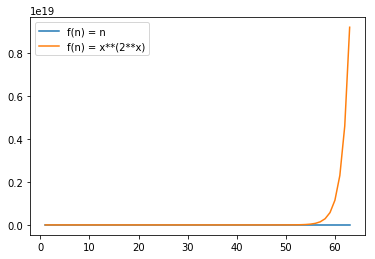

In [277]:
# While dtype=object does get positive values for higher powers, 
# it works incredibly slow with numpy and the code freezes when calculating x**(2**x).
%matplotlib inline
x = np.array([x for x in range(1, 64)], dtype=object)

print(np.power(2, x))
#x2x =  x**(2**x)
x2x = np.power(2, x)

plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, x2x, label = 'f(n) = x**(2**x)')

plt.legend()
plt.show()

One approach is to graph these functions for large values of n. Once in a while this can be misleading, however. Another useful trick is to take logarithms and see what happens.

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.


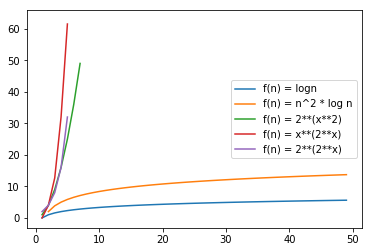

In [314]:
# Bettwer analysis using log of previous expressions

# Analysing the following expressions
%matplotlib inline
x = np.array([x for x in range(1, 50)])
x2logx = np.log2(np.power(x, 2) * np.log2(x))
i2x2 = np.log2(np.power(2, np.power(x, 2)))
#print(np.power(2, x))
x2x =  np.log2(np.power(x, np.power(2, x)) )
i22x = np.log2(np.power(2, np.power(2, x)) )


plt.plot(x, np.log2(x), label = 'f(n) = logn')
plt.plot(x, x2logx, label = 'f(n) = n^2 * log n')
plt.plot(x, i2x2, label = 'f(n) = 2**(x**2)')
plt.plot(x, x2x, label = 'f(n) = x**(2**x)')
plt.plot(x, i22x, label = 'f(n) = 2**(2**x)')

plt.legend()
plt.show()



In [ ]:
# Better analysis using log of previous expressions

# Analysing the following expressions
%matplotlib inline
x = np.array([x for x in range(1, 50)])
x2logx = np.log2(np.power(x, 2) * np.log2(x))
i2x2 = np.log2(np.power(2, np.power(x, 2)))
#print(np.power(2, x))
x2x =  np.log2(np.power(x, np.power(2, x)) )
i22x = np.log2(np.power(2, np.power(2, x)) )


plt.plot(x, np.log2(x), label = 'f(n) = n')
plt.plot(x, x2logx, label = 'f(n) = n^2 * log n')
plt.plot(x, i2x2, label = 'f(n) = 2**(x**2)')
plt.plot(x, x2x, label = 'f(n) = x**(2**x)')
plt.plot(x, i22x, label = 'f(n) = 2**(2**x)')

plt.legend()
plt.show()


Following function prints values of for the given value n for various functions passed to it

In [301]:
def evaluateFns(x, **kwargs):
    return [(name, f(x)) for name, f in kwargs.items()]


evaluated = evaluateFns(10, sqrt = lambda n: np.sqrt(n),
                        ten_to_n = lambda n: 10 ** n,
                        n_to_1_5 = lambda n: n ** 1.5,
                        two_to_sqrt_logn = lambda n: 2 ** np.sqrt(np.log(n)),
                        n_to_5_by_3 = lambda n: n ** (5 / 3),
                        n_square_log_n = lambda n: n * n * np.log2(n),
                        two_to_n = lambda n: 2 ** n,
                        two_to_two_to_n = lambda n: 2 ** (2 ** n),
                        n_to_logn = lambda n: n ** np.log2(n),
                        n_square = lambda n: n ** n,
                        two_to_log_n = lambda n: 2 ** np.log2(n),
                        two_to_two_to_log_n = lambda n: 2 ** (2 ** np.log2(n)),
                        n_to_5_by_2 = lambda n: n ** (5 / 2),
                        two_to_n_square = lambda n: 2 ** (n * n)    )

sorted(evaluated, key = lambda t: t[1]) # take second element for sort


[('two_to_sqrt_logn', 2.862800485405474),
 ('sqrt', 3.1622776601683795),
 ('two_to_log_n', 9.999999999999998),
 ('n_to_5_by_3', 10),
 ('n_to_1_5', 31.622776601683793),
 ('n_to_5_by_2', 100),
 ('n_square_log_n', 332.1928094887362),
 ('two_to_two_to_log_n', 1023.9999999999987),
 ('two_to_n', 1024),
 ('n_to_logn', 2098.592395866662),
 ('n_square', 10000000000),
 ('ten_to_n', 10000000000),
 ('two_to_n_square', 1267650600228229401496703205376L),
 ('two_to_two_to_n',
  179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216L)]

In [316]:
def evaluateFns(x, **kwargs):
    for name, f in kwargs.items():
        plt.plot(x, f(x), label = 'f(n) = '+name )
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log2
  """
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


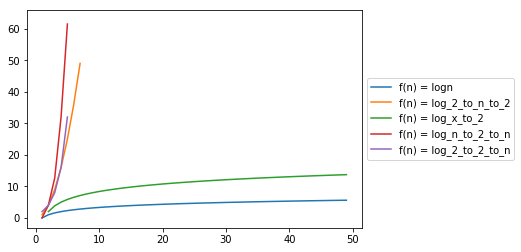

In [317]:
x = np.array([x for x in range(1, 50)])
evaluateFns(x, logn = lambda n: np.log2(n),
               log_x_to_2 = lambda n: np.log2(np.power(n, 2) * np.log2(n)),
               log_2_to_n_to_2 = lambda n: np.log2(np.power(2, np.power(n, 2))),
               log_n_to_2_to_n = lambda n: np.log2(np.power(n, np.power(2, n)) ),
               log_2_to_2_to_n = lambda n: np.log2(np.power(2, np.power(2, n)) ),
                )

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/Users/aishwaya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


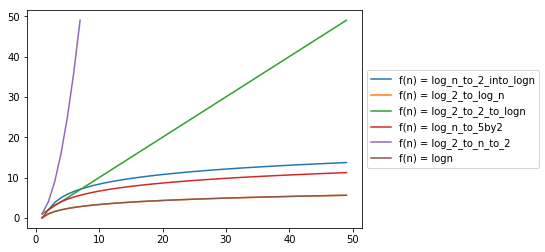

In [318]:
x = np.array([x for x in range(1, 50)])
evaluateFns(x, logn = lambda n: np.log2(n),
               log_2_to_log_n = lambda n: np.log2(np.power(2, np.log2(n))),
               log_2_to_2_to_logn = lambda n: np.log2(np.power(2, np.power(2, np.log2(n)))),
               log_n_to_5by2 = lambda n: np.log2(np.power(n, 5/2) ),
               log_2_to_n_to_2 = lambda n: np.log2(np.power(2, np.power(n, 2)) ),
               log_n_to_2_into_logn = lambda n: np.log2(np.power(n, 2) * np.log2(n)),
                )